# First Project in ML After Long Time
# Predict Solubility of Molecule based on Molwt, NumRotatableBonds,MoLop

## Load Data From ./


In [1]:
import pandas as pd
df=pd.read_csv('./delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [2]:
df.head(5)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


#***Data Preparation***


## Data Separation as X and Y

In [3]:
y=df['logS'];
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Train Test Spilit

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [6]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [7]:
print(x_train.shape)
print(y_train.shape)


(915, 4)
(915,)


# Model Building/Creating
## Linear Regression

In [8]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
df = pd.read_csv('./delaney_solubility_with_descriptors.csv')

# Check for missing values
print("Missing values in x:")
print(df.isnull().sum())

# Data Preparation
y = df['logS']
x = df.drop('logS', axis=1)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Normalize data
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1)

])

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(x_train_normalized, y_train, epochs=100, verbose=0)

loss = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", loss)
# Make predictions
y_pred = model.predict(x_test)

print(model.summary())


Missing values in x:
MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64
8/8 [==============================] - 0s 2ms/step - loss: 0.6251
Test Loss: 0.6251115798950195
8/8 [==============================] - 0s 2ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [11]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)
print(y_lr_train_pred,y_lr_test_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

In [12]:
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [13]:
print('LR MSE(Train)',lr_train_mse)
print('LR R2(Train)',lr_train_r2)

print('LR MSE(Test)',lr_test_mse)
print('LR R2(Test)',lr_test_r2)

LR MSE(Train) 1.0075362951093687
LR R2(Train) 0.7645051774663391
LR MSE(Test) 1.0206953660861033
LR R2(Test) 0.7891616188563282


In [14]:
from sklearn.metrics import accuracy_score

# Define bins for solubility categories
low_threshold = -2
high_threshold = 2

# Convert continuous predictions to categories
y_pred_categories = pd.cut(y_lr_test_pred, bins=[float('-inf'), low_threshold, high_threshold, float('inf')], labels=['low', 'medium', 'high'])

# Convert continuous true labels to categories
y_test_categories = pd.cut(y_test, bins=[float('-inf'), low_threshold, high_threshold, float('inf')], labels=['low', 'medium', 'high'])

# Calculate accuracy
accuracy = accuracy_score(y_test_categories, y_pred_categories)
print("Accuracy:", accuracy)

lr_result=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_result.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_result


Accuracy: 0.851528384279476


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## Random Forest Regressior for above dataset

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=100);

rf.fit(x_train,y_train)
y_rf_train_pred=rf.predict(x_train)
y_rf_test_pred=rf.predict(x_test)





In [16]:
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2=r2_score(y_train,y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2=r2_score(y_test,y_rf_test_pred)

rf_result=pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_result.columns=['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## MODEL COMPARISION

In [17]:
df_models=pd.concat([lr_result,rf_result],axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [18]:
df_models.reset_index()

,index,Method,Training MSE,Training R2,Test MSE,Test R2
0,0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization

Text(0.5, 0, 'Experimental logs')

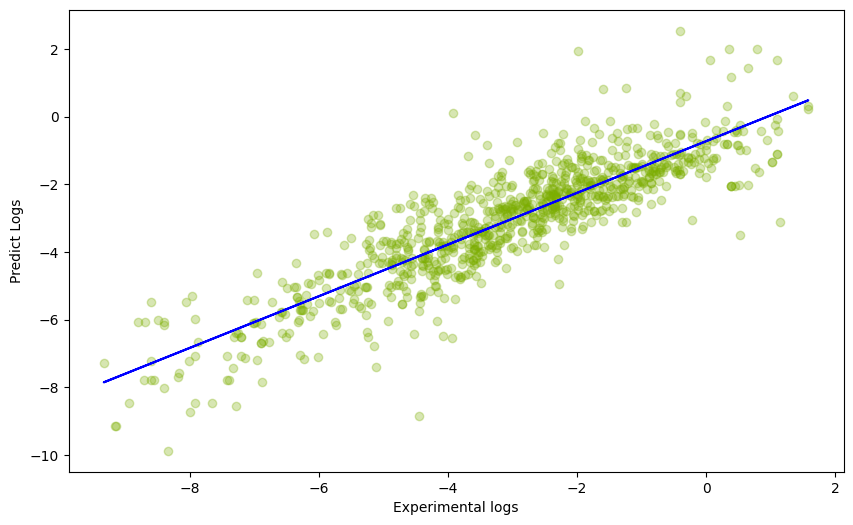

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=y_train,y=y_lr_train_pred, c='#7cAE00',alpha=0.3)

z=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(z)

plt.plot(y_train,p(y_train),c='b')
plt.ylabel('Predict Logs')
plt.xlabel('Experimental logs')